<a href="https://colab.research.google.com/github/priaJuli/Project-ML-Dicoding/blob/master/Dicoding_Image_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Diri :

Nama Lengkap : # # MALAU

Username : #

email : #

Headline : # MALAU, M.Kom

In [ ]:
import zipfile,os

datasetpath = '/content/rockpaperscissors.zip'

if not os.path.isfile(datasetpath):
    !wget "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"

In [ ]:
zip_ref = zipfile.ZipFile(datasetpath, 'r')
zip_ref.extractall('/content/tmp/')
zip_ref.close()

In [ ]:
import shutil
shutil.rmtree('/content/tmp/rockpaperscissors/rps-cv-images/')

In [ ]:
os.remove("/content/tmp/rockpaperscissors/README_rpc-cv-images.txt")

In [ ]:
base_dir = '/content/tmp/rockpaperscissors'
os.listdir(base_dir)

['rock', 'scissors', 'paper']

Augmentation image used :  

1. Rotation images
2. Horizontal flip


Class mode : Categorical

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class MyImageGenerator:
    def __init__(self, base_dir, split_ratio, targetsize):
        self.base_dir = base_dir
        self.split_ratio = split_ratio
        self.targetsize = targetsize

    def get_train_test(self):
        datagen = ImageDataGenerator(
                        rescale=1./255,
                        rotation_range=20,  # Random rotation
                        # zoom_range=0.2,  # Random zoom
                        horizontal_flip=True,  # Random horizontal flip
                        validation_split=self.split_ratio)
        train_generator = datagen.flow_from_directory(
                  self.base_dir,
                  target_size=self.targetsize,
                  batch_size=32,
                  class_mode='categorical',
                  shuffle=True,
                  subset='training')

        test_generator = datagen.flow_from_directory(
                  self.base_dir,
                  target_size=self.targetsize,
                  batch_size=32,
                  class_mode='categorical',
                  shuffle=True,
                  subset='validation'
                  )
        return train_generator, test_generator

Create Class Custom Image Generator with validation rate 0.4 and resize to 64, 64

In [ ]:
generator = MyImageGenerator(base_dir, 0.4, (64, 64))

In [ ]:
train_generator, test_generator = generator.get_train_test()

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
classnames = {v: k for k, v in test_generator.class_indices.items()}

In [ ]:
print(test_generator.n)
print(train_generator.n)

874
1314


In [ ]:
print(len(test_generator[0][1]))


32


In order to generalize or improve accuracy, Convolution, MaxPooling, and Dropout is used

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [ ]:
model.compile(optimizer='sgd',  # Optimizer
              loss='categorical_crossentropy',  # Categorical cross-entropy loss for multi-class classification
              metrics=['accuracy'])

class ValidationMax(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ValidationMax, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True
            print("Epoch {}: Stop training because validation accuracy reach more than {}%, validation accuracy = {:7.2f}".format(epoch+1, (self.threshold * 100), val_acc))

Create Custom Classback for stop iteration for training when validation accuracy more than threshold parameter.

Train the model up to 150 epochs.

In [ ]:
stopmax = ValidationMax(threshold=0.94)

model.fit(
      train_generator,
      batch_size=32,
      epochs=150,
      validation_data=test_generator,
      steps_per_epoch=24,
      verbose=2,
      callbacks=[stopmax])

Epoch 1/150
24/24 - 8s - loss: 1.1073 - accuracy: 0.3577 - val_loss: 1.0947 - val_accuracy: 0.3364 - 8s/epoch - 343ms/step
Epoch 2/150
24/24 - 7s - loss: 1.1029 - accuracy: 0.3659 - val_loss: 1.0944 - val_accuracy: 0.3467 - 7s/epoch - 284ms/step
Epoch 3/150
24/24 - 7s - loss: 1.1050 - accuracy: 0.3581 - val_loss: 1.0944 - val_accuracy: 0.4851 - 7s/epoch - 297ms/step
Epoch 4/150
24/24 - 8s - loss: 1.1020 - accuracy: 0.3252 - val_loss: 1.0961 - val_accuracy: 0.3455 - 8s/epoch - 348ms/step
Epoch 5/150
24/24 - 7s - loss: 1.0862 - accuracy: 0.3841 - val_loss: 1.0927 - val_accuracy: 0.4005 - 7s/epoch - 288ms/step
Epoch 6/150
24/24 - 7s - loss: 1.0872 - accuracy: 0.3930 - val_loss: 1.0901 - val_accuracy: 0.4714 - 7s/epoch - 285ms/step
Epoch 7/150
24/24 - 7s - loss: 1.0868 - accuracy: 0.3604 - val_loss: 1.0862 - val_accuracy: 0.5435 - 7s/epoch - 276ms/step
Epoch 8/150
24/24 - 7s - loss: 1.0771 - accuracy: 0.4106 - val_loss: 1.0826 - val_accuracy: 0.5103 - 7s/epoch - 282ms/step
Epoch 9/150
24/2

Stop the training process in epoch 107, which validation accuracy reach more than 94%

Create last step for upload new unseen data for test the model.

Saving 0OEXfEooCXlljaEl.png to 0OEXfEooCXlljaEl (2).png
Saving 1CXgK9fgGdSRggD9.png to 1CXgK9fgGdSRggD9 (2).png
1/1 [==============================] - 0s 149ms/step
0OEXfEooCXlljaEl (2).png
Class predict = rock
[[0.10325311 0.89097905 0.00576781]]
1/1 [==============================] - 0s 27ms/step
1CXgK9fgGdSRggD9 (2).png
Class predict = scissors
[[0.02355693 0.00613599 0.97030705]]


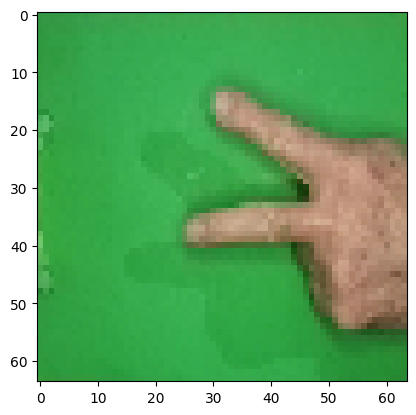

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = fn
    img = image.load_img(path, target_size=(64,64))

    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    images /= 255

    classes = model.predict(images, batch_size=10)
    print(fn)
    print("Class predict = {}".format(classnames[np.argmax(classes)]))
    print(classes)